In [1]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import cm
import time
import sys
sys.path.append(os.path.join(os.getcwd(), '..', 'utils'))
from compute_tau import compute_tau_star
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
sns.set_style("whitegrid",  {"grid.linewidth": 0.6})
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
figsize = (8, 6)
figsize2 = (16, 6)
marker_list = ['o', 'v', 's', 'P', '*', 'X', 'D']
cmap = plt.get_cmap("tab10")
cmap2 = plt.get_cmap("tab20")
contour_cmap = plt.cm.get_cmap('Greys_r')
contour_points = 100000
alpha = .6
fig_dir = os.path.join(os.getcwd(), 'torus_figs')
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
ss= 250
ms=15
ms2=20
ls=20
fs=30
fs2=24
lsp=0.1
htp=.1
ms3=.5
pad = 20
offset=850
density = 1.25
mew=2
slw = 2.5
verbose=True
show=True
save=True
lw=4
frameon=False

## Game and Derivatives

In [3]:
def f1_func(x,y,a,b):
    return -a*np.cos(x)+np.cos(x-y)+b*np.cos(y)

def d1f1_func(x,y,a,b):
    return a*np.sin(x)-np.sin(x-y)

def d2f2_func(x,y,a,b):
    return -np.sin(x-y)+b*np.sin(y)

def d22f2_func(x,y,a,b):
    return np.cos(x-y)+b*np.cos(y)

def d11f1_func(x,y,a,b):
    return a*np.cos(x) - np.cos(x - y)

def d12f1_func(x,y,a,b):
    return np.cos(x-y)

def d21f2_func(x,y,a,b):
    return -np.cos(x-y)

def J_func(x,y,a,b):
    return np.array([[d11f1_func(x,y,a,b), d12f1_func(x,y,a,b)],[d21f2_func(x,y,a,b),d22f2_func(x,y,a,b)]])

def J_tau_func(x,y,a,b, tau=1):
    return np.array([[d11f1_func(x,y,a,b), d12f1_func(x,y,a,b)],[tau*d21f2_func(x,y,a,b),tau*d22f2_func(x,y,a,b)]])


def normalize_angle(theta):
        
    if theta < -np.pi or theta > np.pi:
        low = -np.pi
        high = np.pi
        width = 2*np.pi
        offset = theta - low
        theta_normalized = offset - ((offset//width)*width) + low
    else:
        theta_normalized = theta
        
    return theta_normalized

def normalize_angle_arr(theta):
    
    idx = np.where(((theta < -np.pi) | (theta > np.pi)))
    low = -np.pi
    high = np.pi
    width = 2*np.pi
    offset = theta[idx[0], idx[1]] - low
    theta[idx[0], idx[1]] = offset - ((offset//width)*width) + low
        
    return theta

a=0.15
b=0.15
# stable critical points
critical_points = np.array([[0, 0], [np.pi, np.pi], [-np.pi, -np.pi], [np.pi, -np.pi], [-np.pi, np.pi]])

## Run Dynamics

In [4]:
def run_dynamics(x_init, y_init, tau_list=[1, 2, 5, 10]):

    num_epochs = 200000
    learning_rate = .001
    freq = 30000
    trajectories = []

    for tau in tau_list:

        trajectory = []
        x = np.array([x_init])
        y = np.array([y_init])

        z = np.concatenate([x, y]).flatten()

        trajectory.append(z)
        start = time.time()

        for epoch in range(1, num_epochs+1):

            d1f1 = d1f1_func(x, y, a, b)             
            d2f2 = d2f2_func(x, y, a, b)

            x = x - learning_rate * d1f1_func(x, y, a, b)      
            x = normalize_angle(x)
            y = y - tau*learning_rate * d2f2_func(x, y, a, b)
            y = normalize_angle(y)

            z = np.concatenate([x, y])
            trajectory.append(z)
            dz = np.concatenate([d1f1, d2f2])

            if verbose:
                if epoch % freq == 0:
                    print(epoch, z)

        trajectory = np.vstack(trajectory)
        trajectories.append(trajectory)

        end = time.time()

        if verbose:
            print('Finished in {:.2f} Seconds'.format(end-start))
            
    return trajectories

## Plot Vector Field

30000 [-2.97921936  0.69862119]
60000 [-2.0913338   0.73171955]
90000 [ 2.5610068 -0.9677123]
120000 [ 2.38015625 -0.2668227 ]
150000 [-2.18651793  1.08493424]
180000 [-2.91715735 -0.33789866]
Finished in 3.79 Seconds
30000 [-0.69723496 -0.61786188]
60000 [-0.30108208 -0.26570637]
90000 [-0.11865766 -0.10463355]
120000 [-0.04600306 -0.040561  ]
150000 [-0.01779018 -0.01568535]
180000 [-0.00687716 -0.00606348]
Finished in 4.04 Seconds
30000 [2.95556437 2.92121712]
60000 [3.07873705 3.06701881]
90000 [3.12063367 3.11672191]
120000 [3.13461446 3.13331189]
150000 [3.13926968 3.13883607]
180000 [3.14081938 3.14067503]
Finished in 3.77 Seconds
30000 [2.66351348 2.58250869]
60000 [2.93341139 2.89625478]
90000 [3.05732991 3.04213457]
120000 [3.10795475 3.10187839]
150000 [3.12819464 3.12577376]
180000 [3.13625813 3.1352942 ]
Finished in 3.67 Seconds
30000 [0.17100494 2.87640596]
60000 [-0.82305213  1.58764562]
90000 [-1.85797793  0.17717011]
120000 [-2.65404806 -0.68637233]
150000 [-2.95965868

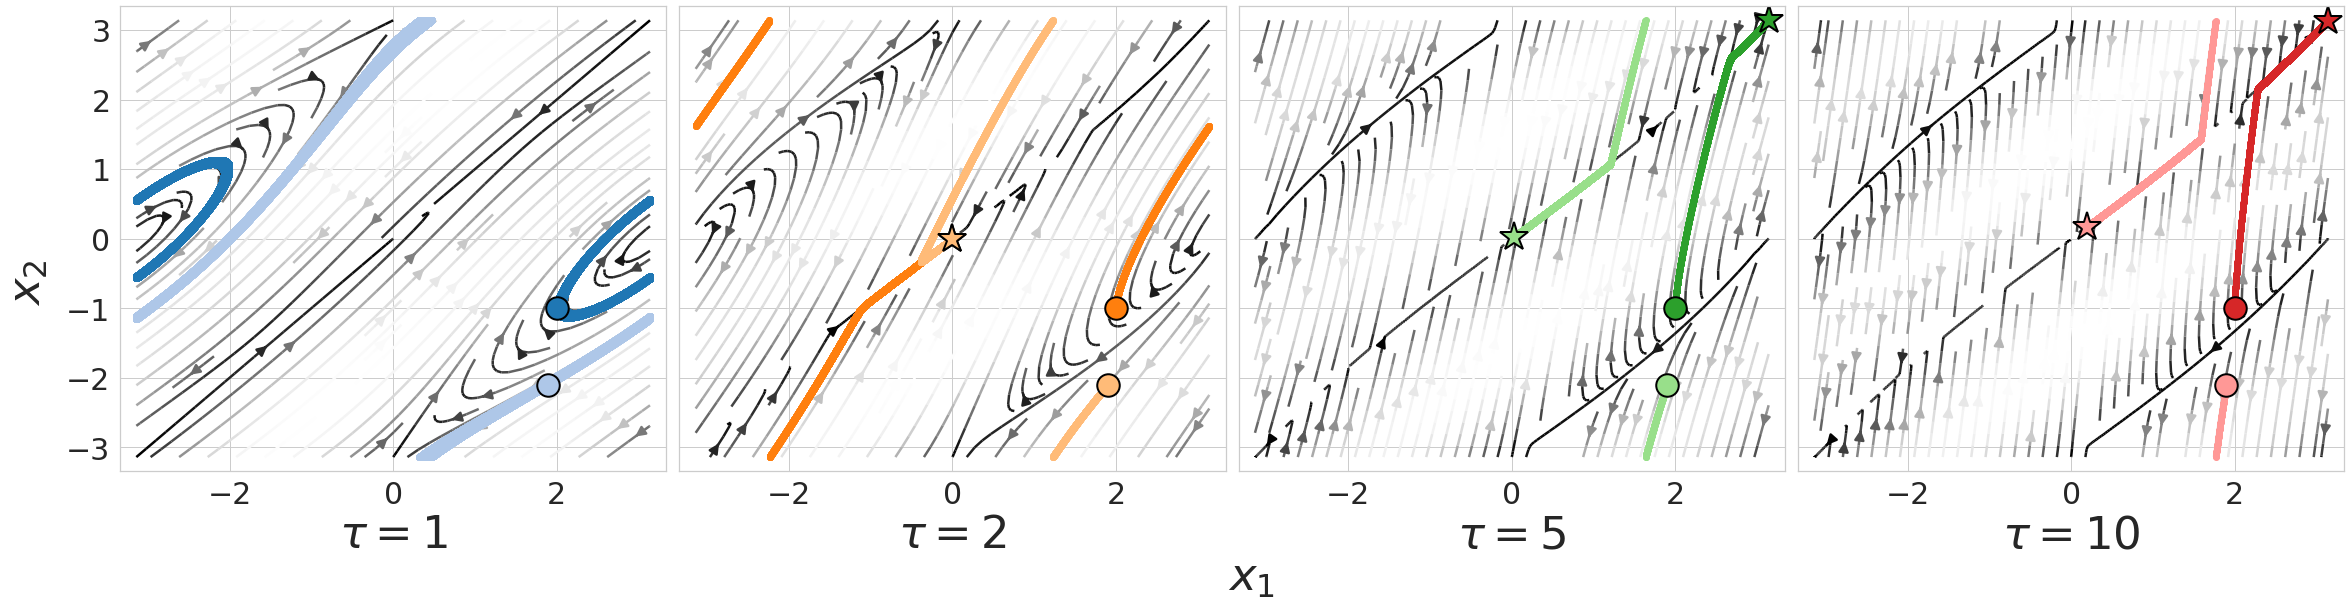

In [6]:
tau_list = [1, 2, 5, 10]

x_init = 2
y_init = -1
trajectories1 = run_dynamics(x_init, y_init, tau_list)

x_init = 1.9
y_init = -2.1
trajectories2 = run_dynamics(x_init, y_init, tau_list)

trajectories_list = [trajectories1, trajectories2]

fig, ax = plt.subplots(1, len(tau_list), figsize=(8*len(tau_list), 8), sharex=True, sharey=True)
bdd = np.pi
for count, tau in enumerate(tau_list):
    xlims = [-bdd, bdd]
    ylims = [-bdd, bdd]
    x, y = np.meshgrid(np.linspace(xlims[0],xlims[1], int(np.sqrt(contour_points))), np.linspace(ylims[0], ylims[1], int(np.sqrt(contour_points))))
    z1 = -d1f1_func(x, y, a, b)
    z2 = -tau*d2f2_func(x, y, a, b)
    z3 = np.sqrt(z1**2 + z2**2)
    z3 = z3/z3.max()
    ax[count].streamplot(x, y, z1, z2, color=z3, cmap=contour_cmap, density=density, linewidth=slw, arrowsize=2)
    
    for c_count, trajectories in enumerate(trajectories_list):
        num = count*2+c_count
        trajectory = trajectories[count]
        ax[count].plot(trajectory[:, 0], trajectory[:, 1], 'o', color=cmap2(num), lw=lw*2)
        if tau != 1:
            ax[count].plot(trajectory[-1, 0], trajectory[-1, 1], color=cmap2(num), markeredgecolor='black', marker='*', markersize=ms2*1.5, ls='none', markeredgewidth=mew)
        ax[count].plot(trajectory[0, 0], trajectory[0, 1], color=cmap2(num), markeredgecolor='black', marker='o', markersize=ms*1.5, ls='none', markeredgewidth=mew)
    xlims = [-bdd-.2, bdd+.2]
    ylims = [-bdd-.2, bdd+.2]
    ax[count].set_xlim(xlims)
    ax[count].set_ylim(ylims)
    ax[count].tick_params(labelsize=ls*1.5)
    ax[count].set_xlabel(r'$\tau=%d$'%tau, fontsize=fs*1.5)

fig.text(0.52, -0.035, '$x_1$', ha='center', fontsize=fs*1.5)
fig.text(-0.02, 0.5, '$x_2$', va='center', rotation='vertical', fontsize=fs*1.5)
plt.tight_layout()


if save:
    plt.savefig(os.path.join(fig_dir, 'simgrad_vfield.png'), bbox_inches='tight')
if show:
    plt.show()

## Plot Region of Attraction

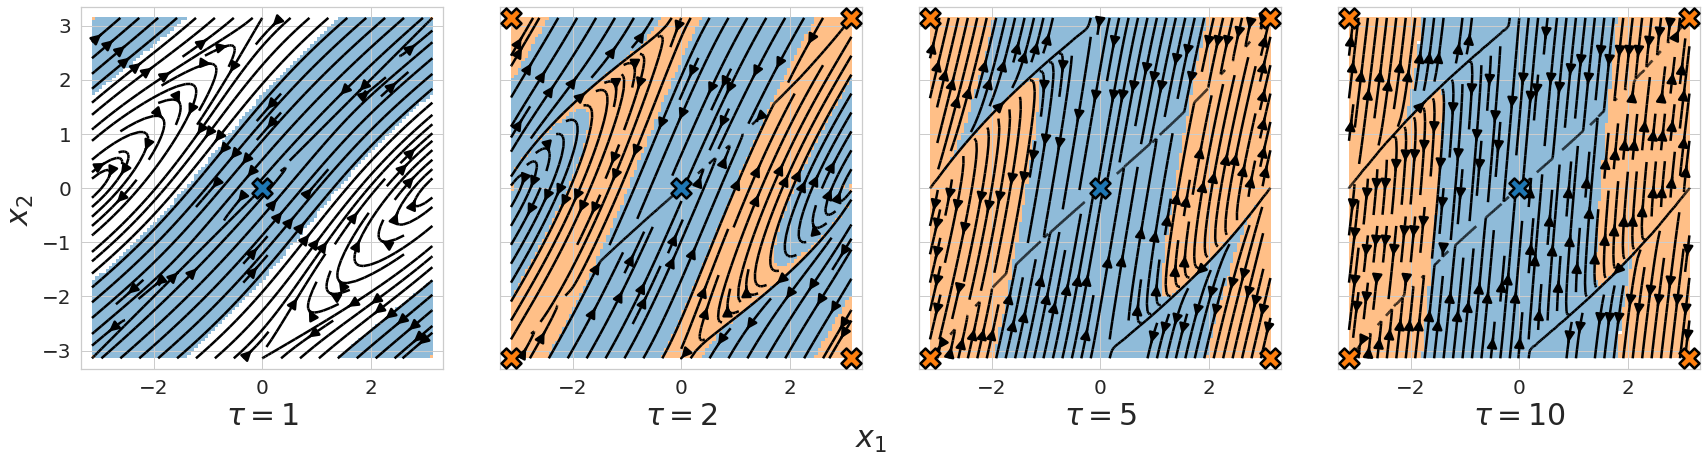

In [7]:
roa_points = 100
num_iters =20000
bdd=1*np.pi
learning_rate = 0.04
tau_list = [1, 2, 5, 10]
xlims_roa = [-bdd, bdd]
ylims_roa = [-bdd, bdd]
a=0.15
b=0.15
fig, ax = plt.subplots(1, len(tau_list), figsize=(6*len(tau_list), 6), sharex=True, sharey=True)

for tau_num, tau in enumerate(tau_list):
    x_inits, y_inits = np.meshgrid(np.linspace(xlims_roa[0],xlims_roa[1], roa_points), np.linspace(ylims_roa[0], ylims_roa[1], roa_points))
    z = np.zeros(x_inits.shape)

    x = x_inits
    y = y_inits

    for count in range(num_iters+1):
        x = x - learning_rate * d1f1_func(x, y, a, b)      
        x = normalize_angle_arr(x)
        y = y - tau*learning_rate * d2f2_func(x, y, a, b)
        y = normalize_angle_arr(y)

    condition1 = (np.min(np.array([np.sqrt(np.power(x-critical_points[i, 0], 2)+ np.power(y-critical_points[i, 1], 2)) for i in range(len(critical_points))]), axis=0)<1e-4) 
    z = -1*np.ones(x_inits.shape)
    z[condition1] = np.argmin(np.array([np.sqrt(np.power(x-critical_points[i, 0], 2)+ np.power(y-critical_points[i, 1], 2)) for i in range(len(critical_points))]), axis=0)[condition1]
    cmap_custom = ListedColormap(['white', cmap(0), cmap(1), cmap(1), cmap(1), cmap(1)])
    z1 = -d1f1_func(x_inits, y_inits, a, b)
    z2 = -tau*d2f2_func(x_inits, y_inits, a, b)
    ax[tau_num].imshow(z, origin='lower', extent=xlims_roa+ylims_roa, zorder=-20, cmap=cmap_custom, alpha=.5, vmin=-2, vmax=cmap_custom.N)
    ax[tau_num].streamplot(x_inits, y_inits, z1, z2, color='black', density=density, linewidth=slw, arrowsize=2, zorder=5)
    
    ax[tau_num].scatter(0, 0, s=400, zorder=10, edgecolor='black', lw=2.5, color=cmap(0), marker='X')
    if tau>1:
        ax[tau_num].scatter(np.pi, np.pi, s=400, zorder=10, edgecolor='black', lw=2.5, color=cmap(1), marker='X')
        ax[tau_num].scatter(-np.pi, -np.pi, s=400, zorder=10, edgecolor='black', lw=2.5, color=cmap(1), marker='X')
        ax[tau_num].scatter(np.pi, -np.pi, s=400, zorder=10, edgecolor='black', lw=2.5, color=cmap(1), marker='X')
        ax[tau_num].scatter(-np.pi, np.pi, s=400, zorder=10, edgecolor='black', lw=2.5, color=cmap(1), marker='X')
    ax[tau_num].set_xlim([-np.pi-.2, np.pi+.2])
    ax[tau_num].set_ylim([-np.pi-.2, np.pi+.2])
    ax[tau_num].tick_params(labelsize=ls)
    ax[tau_num].set_xlabel(r'$\tau=%d$'%tau, fontsize=fs)

fig.text(0.5, -0.05, '$x_1$', ha='center', fontsize=fs)
fig.text(-0.0, 0.5, '$x_2$', va='center', rotation='vertical', fontsize=fs)
plt.tight_layout()
if save:
    plt.savefig(os.path.join(fig_dir, 'roa.png'), bbox_inches='tight')
if show:
    plt.show()

## Compute $\tau^{\ast}$

In [7]:
m = 1
n = 1
a=0.15
b=0.15
for critical_point in [[0,0],[np.pi,np.pi]]:
    x, y = critical_point
    J = J_tau_func(x, y, a, b, 1)
    tau_star = compute_tau_star(J, m, n)
    if type(tau_star) is str:
        print('critical point (x, y) = ({:.2f}, {:.2f}):'.format(x, y), tau_star)
    else:
        print(r'tau = {:.2f}'.format(tau_star), '@ critical point (x, y) = ({:.2f}, {:.2f})'.format(x, y))

tau = 0.74 @ critical point (x, y) = (0.00, 0.00)
tau = 1.35 @ critical point (x, y) = (3.14, 3.14)
